In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

modelpath = './MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size = 200, verbose=0, callbacks = [early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.18458, saving model to .\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18458 to 0.13417, saving model to .\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13417 to 0.11307, saving model to .\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11307 to 0.10140, saving model to .\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10140 to 0.09317, saving model to .\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09317 to 0.09000, saving model to .\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09000 to 0.08560, saving model to .\MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08560 to 0.08369, saving model to .\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08369

Epoch 10: val_loss improved from 0.08369 to 0.08119, saving model to .\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08119

Epoch 12: val_loss did not improve from 0.08119

Epoch 13: val_loss did not improve from 0.08119

Epoch 14: val_loss did not improv

313/313 [==============================] - 0s 940us/step - loss: 0.0697 - accuracy: 0.9808

 Test Accuracy : 0.9808


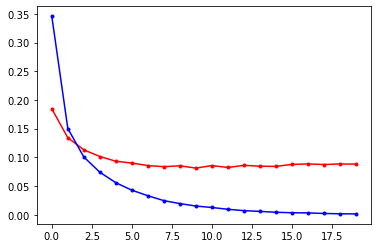

In [7]:
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c= 'blue', label = 'Testset_loss')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


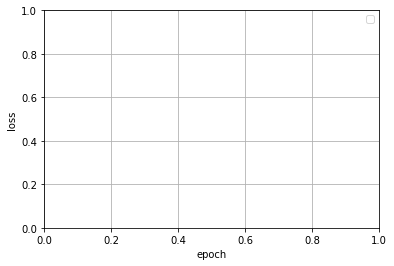

In [8]:
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()